<p style='text-align: center'><font size= "5"> CCT College Dublin </p></font>

**Module Title:** Data Preparation

**Assessment Title:** CA2_DataPrep_HDip

**Lecturer Name:** David McQuaid

**Student Full Name:** Laercio Santos Lima

**Student Number:** 2022055

**Assessment Due Date:** 02/04/2022

**Date of Submission:** 02/04/2022


 
<br><br> 

**Declaration** 
			
<p style='text-align: justify;'>By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.</p>








# Introduction



<p style='text-align: justify;'>This project intends to better explain real time data obtained from sensors of the Scania trucks to predict failures due to air pressure systems (APS). This data has only 2 classes (positive and negative).
Besides doing exploratory data analysis, problems and difficulties such as missing values will be addressed. 
Finally, one of the goals in this project is to prepare the dataset for future modeling, by reducing its dimensionality.</p>


# Part 1

### Characteristics of the dataset

<p style='text-align: justify;'>In this part I am going to show some characteristics and information about the dataset “aps_failure_set.csv”. First of all, let me import some of the libraries I am going to use.</p>
<br>

In [1]:
# Importing some libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<br>
Let us now take the first look at the dataset. Let us see the first and last 10 rows.
<br><br>

In [2]:
# reading the dataset
df = pd.read_csv("aps_failure_set.csv")

# first 10 rows
df.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [3]:
# last 10 rows
df.tail(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59994,neg,32,0,0,na,0,0,0,0,0,...,258,98,224,166,36,486,0,0,0,0
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [4]:
# Better understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


<br>
<p style='text-align: justify;'>After using info(), I noticed that most of the columns had strings - dtypes: int64(1), object(170) -. In order to better understand it, I decided to use describe().</p>
<br>

In [5]:
# looking for objects
df.describe(include = object)

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


<br><br>
### Fixing NaN and numerical values

<p style='text-align: justify;'>It is clear that “na”  is a string in the dataset. In order to fix that, I am going to read the CSV file again adding na_values in the function. I am going to use info() after that to compare the difference.</p>
<br>

In [6]:
# reading the dataset -- using na_values
df_nan = pd.read_csv("aps_failure_set.csv", na_values="na")

In [7]:
df_nan.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# ckecking info after converting NaN
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


<br>
<p style='text-align: justify;'>Now, when dtypes is checked, it is possible to see that most of the dataset is numerical. There are 169 columns with float values, one with integer and only one with strings. It is also possible to see that there are 60 thousand observations.<br>
Let me show in a different way the amount of rows and columns in the dataset. With this information, it is also possible to calculate the size of the dataset. Besides that, from now on, when showing the dataset, I am going to use head(), since I want to see just the first 5 rows.</p>
<br><br>


In [9]:
# Showing the number of rows and columns
df_nan.shape

(60000, 171)

In [10]:
# Showing the size of the dataset
df_nan.size

10260000

In [11]:
# Showing just the 5 first rows
df_nan.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


<br>
<p style='text-align: justify;'>According to Chandradas (2021),  NaN is a short form for Not A Number. In other words, it is a possible form to show a missing value in a dataset. With this information, I decided to count the amount of missing values in the dataset. In order to do this, I am going to use isna() and sum(), since my intention is to better understand the situation with missing values in the dataset.</p>
<br><br>


In [12]:
#looking for missing values
df_nan.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

<br>
In order to have a better idea, let me count the total amount of missing values in the entire dataset.
<br><br>

In [13]:
#looking for missing values in the entire dataset
df_nan.isna().values.any()

True

In [14]:
# Total number of na in the entire dataset
df_nan.isna().sum().sum()

850015

<br>
<p style='text-align: justify;'>As it is possible to see above, in the entire dataset there are 850015 missing values. Later in this project I will treat this issue.


However, let me first try to better understand the categorical variable “class”.</p>
<br><br>

# Part 2


### Imbalanced Datasets

<p style='text-align: justify;'>According to Yi (2021), a bar chart is one of the best ways to demonstrate a distribution of data points in a categorical feature. In other words, it will give a better idea of how the column “class” is distributed. Besides that, I also decided to show in numbers the exact amount of positives and negatives in the columns class. I am using value_counts() for this second part.</p>
<br><br>


<AxesSubplot:xlabel='count', ylabel='class'>

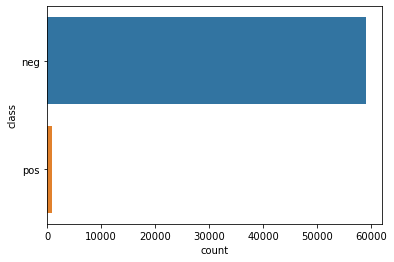

In [15]:
# Ploting the column class
sns.countplot(y='class', data=df_nan)

In [16]:
# Showing the number of positive and negative
df_nan["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

<br>
<p style='text-align: justify;'>According to Agarwal (2020), imbalanced datasets are a special case for classification problems where the class distribution is not uniform among the classes. <br><br>As demonstrated above, this dataset is imbalanced since the negative label occurs in a large number of observations (59 thousand) while the positive label occurs only in one thousand observations. In other words, it means that over 98% of the column class is negative. Let me demonstrate this using a pie chart. </p>
<br><br>

Text(0.5, 1.0, 'Distribution of the column Class')

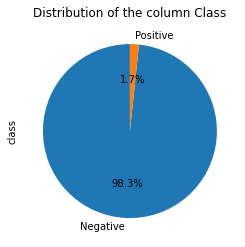

In [17]:
# Showing the percentage of positive and negative
mylabels = ["Negative", "Positive"]
pie_c = df_nan["class"].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle = 90, labels = mylabels)
pie_c.set_title("Distribution of the column Class")



### Duplicated Rows

<p style='text-align: justify;'>According to Bhutani (2018), another important part of data analysis is analyzing duplicated values, and subsequently, deciding to remove them or not. Based on that, I am going to look for duplicated rows in the dataset. In order to do it, first I am going to create a new dataframe. After that, I am going to show the amount of rows that are duplicated.</p>
<br><br>


In [18]:
# looking for duplicated rows
dup_df_nan = df_nan[df_nan.duplicated()]

In [19]:
# Showing the number of duplicated rows
print("Number of duplicated rows: ", dup_df_nan.shape)

Number of duplicated rows:  (0, 171)


<br>
As it is possible to see above, there are no duplicated rows in the dataset. 
<br><br>

### Dropping columns with a large amount of missing data

<p style='text-align: justify;'>After finishing Part 1, it was clear that there is a considerable amount of missing data in this dataset. Let me take as an example the column “ab_000”. In this column there are 46329 missing values out of 60000. It means, over 77% of the data is missing in this column. <br>With this in mind, let me organize a way to show the columns with a large amount of missing data.</p>
<br><br>

In [20]:
# checking missing values for each feature (Percentage)
missing_data = df_nan.isna().sum().div(df_nan.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

# Showing the 10 columns with more missing data
missing_data.head(10)

,0
br_000,82.106667
bq_000,81.203333
bp_000,79.566667
bo_000,77.221667
ab_000,77.215000
cr_000,77.215000
bn_000,73.348333
bm_000,65.915000
bl_000,45.461667
bk_000,38.390000


<br>
<p style='text-align: justify;'>As it is possible to see above, only 7 columns have more than 70% of their data missing. Deciding to keep or drop missing data is always a difficult decision, because it is never possible to know for sure if the data we decide to fill in the spaces is close to the real one; for obvious reasons, since the real data is missing.<br><br> With this idea in mind, it is important to know and understand what the dataset is about, in order to decide how to deal with missing values.<br><br>For this project, I decided to drop columns with over 50% of missing data. It means, 8 out of 171 columns.</p>
<br><br>


In [21]:
# Creating a variable only with over 50% missing 
columns_over_50 = missing_data[missing_data[0]>50]
columns_over_50

,0
br_000,82.106667
bq_000,81.203333
bp_000,79.566667
bo_000,77.221667
ab_000,77.215000
cr_000,77.215000
bn_000,73.348333
bm_000,65.915000


In [22]:
# Preparing the columns to be dropped
columns_to_be_dropped = list(columns_over_50.index)
columns_to_be_dropped

['br_000',
 'bq_000',
 'bp_000',
 'bo_000',
 'ab_000',
 'cr_000',
 'bn_000',
 'bm_000']

In [23]:
# Dropping the columns with large amount of missing values
df_after_dropping = df_nan.drop(columns_to_be_dropped, axis=1)
# Showing it
df_after_dropping.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


<br><br>
After dropping the columns, this is the new shape of the dataset. Let me compare it with the previous one.
<br><br>

In [24]:
# Previous shape of the dataset
df_nan.shape

(60000, 171)

In [25]:
# shape of the dataset after dropping the columns
df_after_dropping.shape

(60000, 163)

<br>

### Filling the remaining missing values

<p style='text-align: justify;'>After dropping  the columns above, it is now time to fill the remaining missing values. According to Kumar (2021), when the dataset has numerical data and it is skewed, one good alternative could be to replace the missing values with the median. On the other hand, if the dataset is symmetrical, the mean could be used. <br><br>Keep that in mind, let me first check if the dataset is skewed or symmetrical.</p>
<br><br>


In [26]:
# Showing skewness 
skewness_df = df_after_dropping.skew()
print(skewness_df)

aa_000      6.115752
ac_000      1.784845
ad_000    212.459406
ae_000     90.588252
af_000     51.671770
             ...    
ee_007     15.717250
ee_008     13.426265
ee_009     29.214135
ef_000     73.432440
eg_000     89.029482
Length: 162, dtype: float64


In [27]:
# Showing most of the df is positively skewed
skewness_df.sort_values(ascending=True)   
       
  

cd_000      0.000000
cb_000      0.664568
ca_000      0.722104
ac_000      1.784845
bs_000      2.006974
             ...    
dh_000    202.907014
ad_000    212.459406
co_000    212.459406
cf_000    212.459407
cs_009    243.531177
Length: 162, dtype: float64

<AxesSubplot:ylabel='Count'>

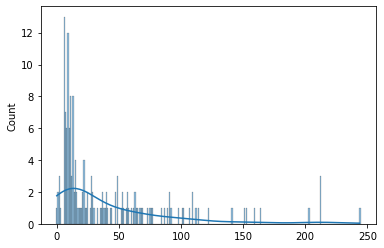

In [28]:
# Ploting to verify if there is skewedness
sns.histplot(skewness_df,kde=True, discrete=True)

<br>
As it is possible to see above, most of the variables in the dataset have some level of skewness. Therefore, I decided to replace the missing values using median. In order to do this, I am going to use fillna().
<br><br>

In [29]:
# replacing the missing values with the median
df_after_replacing = df_after_dropping.fillna(df_after_dropping.median())
df_after_replacing.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


<br>

### Looking for outliers

<p style='text-align: justify;'>It is always important to understand if the dataset has outliers. For this project, I decided to look for them using a box plot. According to Galarnyk (2018), everything that was plotted out of the whiskers as points is considered outliers. As an example, I am going to box plot the first 3 variables.</p>

<br><br>

<AxesSubplot:>

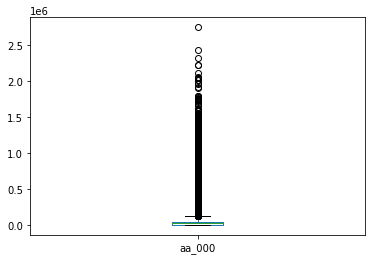

In [30]:
# Using Plot box to detect outliers
df_after_replacing["aa_000"].plot.box()

<AxesSubplot:>

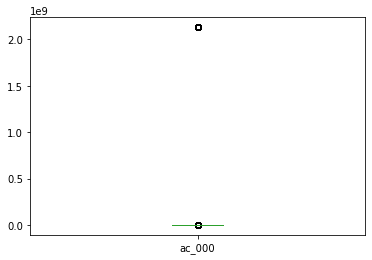

In [31]:
# Using Plot box to detect outliers
df_after_replacing["ac_000"].plot.box()

<AxesSubplot:>

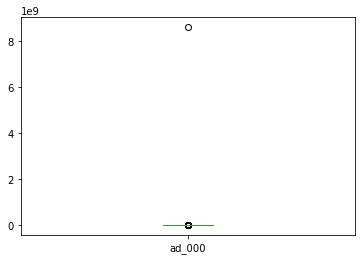

In [32]:
# Using Plot box to detect outliers
df_after_replacing["ad_000"].plot.box()

<br>
<p style='text-align: justify;'>It is clean that there are outliers in the dataset. However, I decided that they are important for the analysis. Consequently, even though I am aware they exist,  they will be kept in the dataset.</p>
<br><br>


# Part 3

### Preparing the PCA

<p style='text-align: justify;'>Firstly, it is important to understand what PCA is and what it is used for. According to Kurita (2020), PCA is short for Principal Component Analysis. Its main objective is to find the most important and meaningful basis in order to represent a specific dataset. 
Besides that, one of the main applications for PCA is to solve issues related to dimensionality. 

Taking into consideration the dataset in this project, it currently has 163 columns.</p>


In [33]:
# Showing the df rows and columns
df_after_replacing.shape

(60000, 163)

<br><br>
I am going to prepare the dataset in order to keep 99.5% of its variance after the PCA. First, I am going to drop the categorical variable “class”.
<br><br>

In [34]:
# copying the results from Part 2
df_preparing_pca = df_after_replacing
df_preparing_pca.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [35]:
# Dropping the categorical variable
df_preparing_pca_no_class = df_preparing_pca.drop(["class"], axis=1)
df_preparing_pca_no_class.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


<br>

### Scaling

<p style='text-align: justify;'>Sometimes, it is important to change the data in a way to make it easier for machine learning models to run without any problems. 
In other words, in order to normalize the features and keep the dataset in a specific finite range, types of feature scaling may be required. <br>Besides that, according to Roy(2020) when performing PCA, scaling is crucial because the analysis seeks out the features with the highest variance, and high variance features skew the analysis towards high magnitude features. <br><br>
For this project I am going to test two techniques of feature scaling. They are called L2-normalization and MaxAbsScaler.</p>
<br><br>


In [36]:
# importing preprocessing
from sklearn import preprocessing

# Using L2-normalization
normalized_df_preparing_pca_no_class = preprocessing.normalize(df_preparing_pca_no_class)

In [37]:
# importing MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

# Using MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(df_preparing_pca_no_class)
maxabs_df_preparing_pca_no_class = scaler.transform(df_preparing_pca_no_class)


<br>

### PCA


<p style='text-align: justify;'>After doing the scaling, it is possible to run PCA to find out the minimum number of features needed. Besides that, it is also possible to compare the different results, since two different techniques of scaling were used. <br>First, I am going to do the PCA on the unscaled data. I am going to do it by plotting a graph. After that, I am going to find out the exact number of features needed to keep 99.5% of the dataset’s variance.</p>
<br><br>

In [38]:
# importing the libraries for PCA
from sklearn.decomposition import PCA

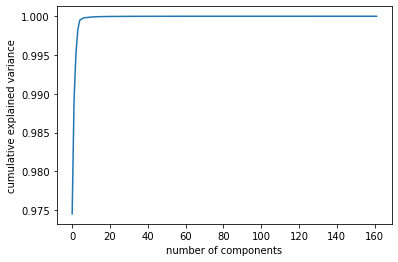

In [39]:
# Showing PCA in a graph - unscaled 
pca_unscaled = PCA().fit(df_preparing_pca_no_class) 
plt.plot(np.cumsum(pca_unscaled.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [40]:
# Showing the number of features needed - unscaled 
pca_unscaled = PCA(0.995).fit(df_preparing_pca_no_class)
pca_unscaled.n_components_

3

<br>
Let me now compare the results when the L2-normalization scaling technique is used.
<br><br>

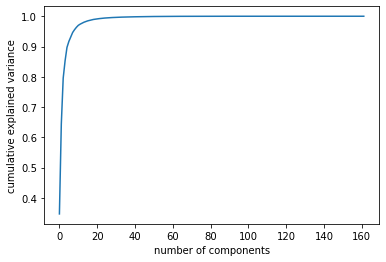

In [41]:
# Showing PCA in a graph - L2-normalization
pca_normalization = PCA().fit(normalized_df_preparing_pca_no_class) 
plt.plot(np.cumsum(pca_normalization.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [42]:
# Showing the number of features needed - L2-normalization
pca_normalization = PCA(0.995).fit(normalized_df_preparing_pca_no_class)
pca_normalization.n_components_

28

<br>
Finally, let me now compare the results when the MaxAbsScaler scaling technique is used.
<br><br>

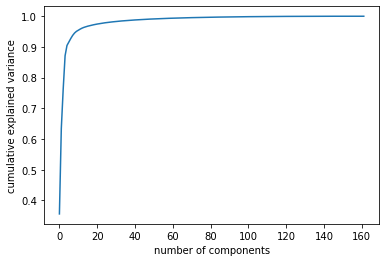

In [43]:
# Showing PCA in a graph - MaxAbsScaler
pca_maxabs = PCA().fit(maxabs_df_preparing_pca_no_class) 
plt.plot(np.cumsum(pca_maxabs.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [44]:
# Showing the number of features needed - MaxAbsScaler
pca_maxabs = PCA(0.995).fit(maxabs_df_preparing_pca_no_class)
pca_maxabs.n_components_

69

<br>
<p style='text-align: justify;'>As it is possible to see above, the minimum number is 3 in the unscaled data. However, as described above, it is important to scale the data before performing PCA. 
For this project, the L2-normalization is the most appropriate since the dataset is rather sparse. 
Keeping this in mind, I am going to perform the PCA to reduce the number of columns. The L2-normalization scaled dataset will be reduced to 28 columns. <br><br>In addition, I am going to recreate and rename the new columns.</p>
<br><br>


In [45]:
# Running PCA with the number I found
pca = PCA(28)
df_doing_pca = pca.fit_transform(normalized_df_preparing_pca_no_class)
df_doing_pca

array([[ 7.18841662e-01,  7.23574210e-01, -6.63006691e-02, ...,
         4.50437972e-04, -1.03714362e-04,  1.94860886e-04],
       [-5.18463155e-01,  1.12937431e-01, -6.96776124e-02, ...,
         1.58101040e-02,  1.11007667e-02, -3.20121898e-03],
       [-4.91143405e-01,  7.51151673e-02, -2.58105366e-01, ...,
        -2.47313393e-02,  1.78193695e-02, -3.49667306e-03],
       ...,
       [ 7.27644314e-01,  7.22751218e-01, -6.33283158e-02, ...,
        -1.15772299e-04,  8.10503589e-06, -1.24665913e-04],
       [ 7.14442792e-01,  7.24317475e-01, -5.01915294e-02, ...,
         7.18224814e-04, -3.06873289e-06,  7.92619686e-05],
       [-2.06547151e-01,  1.40556633e-01,  8.10769418e-01, ...,
         1.40969458e-03, -3.52669965e-03, -4.65875491e-03]])

In [46]:
# reorganizing the dataset in columns
df_after_pca = pd.DataFrame(df_doing_pca, columns =["A", "B", "C", "D", "E", 
                                                    "F", "G", "H", "I", "J", 
                                                    "K", "L", "M", "N", "O", 
                                                    "P", "Q", "R", "S", "T", 
                                                    "U", "V", "W", "X", "Y",
                                                    "Z", "AA", "AB"
                                                   ])
df_after_pca.head()

,A,B,C,D,E,F,G,H,I,J,...,S,T,U,V,W,X,Y,Z,AA,AB
0,0.718842,0.723574,-0.066301,-0.008768,-0.013812,-0.018326,0.002277,-0.007596,-0.012221,0.004092,...,0.001388,0.000951,0.000177,0.000014,0.000254,0.000239,0.000093,0.000450,-0.000104,0.000195
1,-0.518463,0.112937,-0.069678,-0.126101,0.163579,-0.067084,-0.023127,0.000297,-0.038123,0.031971,...,0.022270,0.003798,0.023097,-0.017611,0.008081,0.036672,-0.000266,0.015810,0.011101,-0.003201
2,-0.491143,0.075115,-0.258105,0.061769,-0.145676,-0.072606,0.000006,-0.001650,0.030715,-0.015116,...,-0.014700,-0.024404,-0.008908,-0.006723,0.007355,0.011428,-0.001573,-0.024731,0.017819,-0.003497
3,0.503396,-0.666409,-0.041339,-0.113854,0.007916,-0.001140,0.018054,-0.016236,0.046401,-0.024158,...,0.000802,0.000314,-0.000448,-0.004959,0.001969,-0.003423,-0.000449,0.001782,-0.003019,-0.001870
4,-0.383286,0.135367,0.557533,0.040422,-0.130465,-0.009483,0.003388,-0.000929,-0.011058,0.098864,...,0.011155,-0.024259,0.004552,0.010308,0.000556,0.003210,-0.014685,0.011024,0.001416,0.000798


<br>

### Encoding the column Class

<p style='text-align: justify;'>Finally, after finishing the PCA process, it is important to reinsert the column “class”.  I decided to insert it as the last column of the dataset in order to have a better visualization.</p>

<br><br>

In [47]:
# reinserting the column class
df_after_pca["class"] = df_nan["class"]
df_after_pca.head()

,A,B,C,D,E,F,G,H,I,J,...,T,U,V,W,X,Y,Z,AA,AB,class
0,0.718842,0.723574,-0.066301,-0.008768,-0.013812,-0.018326,0.002277,-0.007596,-0.012221,0.004092,...,0.000951,0.000177,0.000014,0.000254,0.000239,0.000093,0.000450,-0.000104,0.000195,neg
1,-0.518463,0.112937,-0.069678,-0.126101,0.163579,-0.067084,-0.023127,0.000297,-0.038123,0.031971,...,0.003798,0.023097,-0.017611,0.008081,0.036672,-0.000266,0.015810,0.011101,-0.003201,neg
2,-0.491143,0.075115,-0.258105,0.061769,-0.145676,-0.072606,0.000006,-0.001650,0.030715,-0.015116,...,-0.024404,-0.008908,-0.006723,0.007355,0.011428,-0.001573,-0.024731,0.017819,-0.003497,neg
3,0.503396,-0.666409,-0.041339,-0.113854,0.007916,-0.001140,0.018054,-0.016236,0.046401,-0.024158,...,0.000314,-0.000448,-0.004959,0.001969,-0.003423,-0.000449,0.001782,-0.003019,-0.001870,neg
4,-0.383286,0.135367,0.557533,0.040422,-0.130465,-0.009483,0.003388,-0.000929,-0.011058,0.098864,...,-0.024259,0.004552,0.010308,0.000556,0.003210,-0.014685,0.011024,0.001416,0.000798,neg


In [48]:
# checking some information
df_after_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       60000 non-null  float64
 1   B       60000 non-null  float64
 2   C       60000 non-null  float64
 3   D       60000 non-null  float64
 4   E       60000 non-null  float64
 5   F       60000 non-null  float64
 6   G       60000 non-null  float64
 7   H       60000 non-null  float64
 8   I       60000 non-null  float64
 9   J       60000 non-null  float64
 10  K       60000 non-null  float64
 11  L       60000 non-null  float64
 12  M       60000 non-null  float64
 13  N       60000 non-null  float64
 14  O       60000 non-null  float64
 15  P       60000 non-null  float64
 16  Q       60000 non-null  float64
 17  R       60000 non-null  float64
 18  S       60000 non-null  float64
 19  T       60000 non-null  float64
 20  U       60000 non-null  float64
 21  V       60000 non-null  float64
 22

<br><br>
<p style='text-align: justify;'>As it is possible to see above, the type of the columns is float. As expected the column class is “object”. According to Team (2020b), one good practice for data science projects is to encode categorical variables in order to transform them into a numerical variable. With this in mind, I am going to use LabelEncoding() to encode the column class. After that, I am going to drop the column containing the strings.</p>
<br><br>

In [49]:
# importing the library
from sklearn.preprocessing import LabelEncoder

In [50]:
# creating the instance
labelencoder = LabelEncoder()
# Assingning and storing the values
df_after_pca["class_Encoded"] = labelencoder.fit_transform(df_after_pca["class"])
# displaying
df_after_pca.head(10)

,A,B,C,D,E,F,G,H,I,J,...,U,V,W,X,Y,Z,AA,AB,class,class_Encoded
0,0.718842,0.723574,-0.066301,-0.008768,-0.013812,-0.018326,0.002277,-0.007596,-0.012221,0.004092,...,0.000177,0.000014,0.000254,0.000239,0.000093,4.504380e-04,-0.000104,0.000195,neg,0
1,-0.518463,0.112937,-0.069678,-0.126101,0.163579,-0.067084,-0.023127,0.000297,-0.038123,0.031971,...,0.023097,-0.017611,0.008081,0.036672,-0.000266,1.581010e-02,0.011101,-0.003201,neg,0
2,-0.491143,0.075115,-0.258105,0.061769,-0.145676,-0.072606,0.000006,-0.001650,0.030715,-0.015116,...,-0.008908,-0.006723,0.007355,0.011428,-0.001573,-2.473134e-02,0.017819,-0.003497,neg,0
3,0.503396,-0.666409,-0.041339,-0.113854,0.007916,-0.001140,0.018054,-0.016236,0.046401,-0.024158,...,-0.000448,-0.004959,0.001969,-0.003423,-0.000449,1.782166e-03,-0.003019,-0.001870,neg,0
4,-0.383286,0.135367,0.557533,0.040422,-0.130465,-0.009483,0.003388,-0.000929,-0.011058,0.098864,...,0.004552,0.010308,0.000556,0.003210,-0.014685,1.102450e-02,0.001416,0.000798,neg,0
5,0.723751,0.723153,-0.065128,-0.008461,-0.014337,-0.016601,0.002183,-0.006955,-0.010344,0.003196,...,0.000087,0.000020,0.000066,0.000035,-0.000075,-4.410080e-07,-0.000011,0.000098,neg,0
6,0.212793,-0.333071,-0.102051,0.756059,0.076475,0.033355,-0.012077,-0.101030,0.087272,-0.002124,...,0.000191,-0.010181,0.000871,-0.003356,0.005489,-1.237178e-03,-0.001843,-0.004602,neg,0
7,0.718415,0.723619,-0.066176,-0.008417,-0.014076,-0.018337,0.002335,-0.007824,-0.012126,0.004114,...,-0.000123,0.000207,0.000240,0.000494,-0.000178,1.668995e-04,0.000091,0.000087,neg,0
8,-0.445375,0.154988,-0.271104,-0.213573,0.365297,-0.007181,0.001217,0.028800,0.001568,0.133671,...,-0.021859,0.009872,-0.008892,-0.003616,-0.010611,1.639786e-02,-0.021668,0.007083,neg,0
9,-0.346717,0.130240,-0.270840,-0.131224,-0.140244,0.178499,-0.123903,-0.066743,-0.036031,-0.061751,...,0.222876,0.019922,0.038737,-0.013128,-0.012609,-9.363023e-02,-0.000129,0.087488,pos,1


In [51]:
# Dropping the categorical variable
df_final = df_after_pca.drop(["class"], axis=1)
df_final.head(10)

,A,B,C,D,E,F,G,H,I,J,...,T,U,V,W,X,Y,Z,AA,AB,class_Encoded
0,0.718842,0.723574,-0.066301,-0.008768,-0.013812,-0.018326,0.002277,-0.007596,-0.012221,0.004092,...,0.000951,0.000177,0.000014,0.000254,0.000239,0.000093,4.504380e-04,-0.000104,0.000195,0
1,-0.518463,0.112937,-0.069678,-0.126101,0.163579,-0.067084,-0.023127,0.000297,-0.038123,0.031971,...,0.003798,0.023097,-0.017611,0.008081,0.036672,-0.000266,1.581010e-02,0.011101,-0.003201,0
2,-0.491143,0.075115,-0.258105,0.061769,-0.145676,-0.072606,0.000006,-0.001650,0.030715,-0.015116,...,-0.024404,-0.008908,-0.006723,0.007355,0.011428,-0.001573,-2.473134e-02,0.017819,-0.003497,0
3,0.503396,-0.666409,-0.041339,-0.113854,0.007916,-0.001140,0.018054,-0.016236,0.046401,-0.024158,...,0.000314,-0.000448,-0.004959,0.001969,-0.003423,-0.000449,1.782166e-03,-0.003019,-0.001870,0
4,-0.383286,0.135367,0.557533,0.040422,-0.130465,-0.009483,0.003388,-0.000929,-0.011058,0.098864,...,-0.024259,0.004552,0.010308,0.000556,0.003210,-0.014685,1.102450e-02,0.001416,0.000798,0
5,0.723751,0.723153,-0.065128,-0.008461,-0.014337,-0.016601,0.002183,-0.006955,-0.010344,0.003196,...,0.000201,0.000087,0.000020,0.000066,0.000035,-0.000075,-4.410080e-07,-0.000011,0.000098,0
6,0.212793,-0.333071,-0.102051,0.756059,0.076475,0.033355,-0.012077,-0.101030,0.087272,-0.002124,...,0.000711,0.000191,-0.010181,0.000871,-0.003356,0.005489,-1.237178e-03,-0.001843,-0.004602,0
7,0.718415,0.723619,-0.066176,-0.008417,-0.014076,-0.018337,0.002335,-0.007824,-0.012126,0.004114,...,0.000508,-0.000123,0.000207,0.000240,0.000494,-0.000178,1.668995e-04,0.000091,0.000087,0
8,-0.445375,0.154988,-0.271104,-0.213573,0.365297,-0.007181,0.001217,0.028800,0.001568,0.133671,...,0.007004,-0.021859,0.009872,-0.008892,-0.003616,-0.010611,1.639786e-02,-0.021668,0.007083,0
9,-0.346717,0.130240,-0.270840,-0.131224,-0.140244,0.178499,-0.123903,-0.066743,-0.036031,-0.061751,...,0.031725,0.222876,0.019922,0.038737,-0.013128,-0.012609,-9.363023e-02,-0.000129,0.087488,1


<br><br>
<p style='text-align: justify;'>As planned, the categorical variable is now encoded. Neg or negative is shown as 0 (zero) in the variable class_Encoded. Moreover, Pos or positive is shown as 1. Let me demonstrate the type of each variable after all the process.</p>
<br><br>

In [52]:
# Showing info about df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A              60000 non-null  float64
 1   B              60000 non-null  float64
 2   C              60000 non-null  float64
 3   D              60000 non-null  float64
 4   E              60000 non-null  float64
 5   F              60000 non-null  float64
 6   G              60000 non-null  float64
 7   H              60000 non-null  float64
 8   I              60000 non-null  float64
 9   J              60000 non-null  float64
 10  K              60000 non-null  float64
 11  L              60000 non-null  float64
 12  M              60000 non-null  float64
 13  N              60000 non-null  float64
 14  O              60000 non-null  float64
 15  P              60000 non-null  float64
 16  Q              60000 non-null  float64
 17  R              60000 non-null  float64
 18  S     

<br>

### Explained variance for each Principal Component

<p style='text-align: justify;'>Another important information to have about PCA is to know and understand how much each Principal Component contributes for the overall variance of the dataset. In other words, it is possible to know what is the contribution to the percent variance of the entire entire model contributed by each of the principal components.</p>

<br><br>

In [53]:
# Finding the Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.34698899, 0.29670761, 0.15191591, 0.05726166, 0.04419284,
       0.01983018, 0.01483673, 0.01458335, 0.00930941, 0.00787369,
       0.00650593, 0.00396404, 0.00318369, 0.00312756, 0.00239874,
       0.00213965, 0.0016112 , 0.00151474, 0.00144751, 0.00097883,
       0.00093211, 0.0007962 , 0.00075598, 0.00063378, 0.0005695 ,
       0.00048421, 0.00043397, 0.00040945])

<br>

<p style='text-align: justify;'>As it is possible to see above, the first principal component  is the one which will contribute the most to the explained variance (more than 30%). 
I am going to show below the explained variance and the cumulative variance in a way to proportionate better visualization.</p>

<br><br>

In [54]:
# creating the variables
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

# creating the dataset
principal_component_df = pd.DataFrame(['',
                                       "A", "B", "C", "D", "E", 
                                       "F", "G", "H", "I", "J", 
                                       "K", "L", "M", "N", "O", 
                                       "P", "Q", "R", "S", "T", 
                                       "U", "V", "W", "X", "Y",
                                       "Z", "AA", "AB"
                                      ], columns=['PC'])


explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [55]:
# creating the dataset -- concat
dataset_explained_variance = pd.concat([principal_component_df, explained_variance_df, cumulative_variance_df], axis=1)
dataset_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,A,0.346989,0.347
2,B,0.296708,0.644
3,C,0.151916,0.796
4,D,0.057262,0.853
5,E,0.044193,0.897
6,F,0.019830,0.917
7,G,0.014837,0.932
8,H,0.014583,0.947
9,I,0.009309,0.956


<br>

### Performing Machine Learning

<p style='text-align: justify;'>After cleaning and preparing the dataset, it is possible now to use this data to better understand the company’s situation. According to Alexopoulos et al. (2019) data can be handled by Machine Learning for statistical purposes, as well as for more complex purposes such as decision making.<br>
Machine learning is a form of artificial intelligence (AI) that uses historical data as input to predict new performance values.<br>
In this project I decided to use the machine learning model called Random Forest Classifier. According to Yiu (2019)  the random forest is a classification algorithm consisting of many decision trees that are more accurate than any individual tree. The choice was based on evidence that shows that this model has good performance with categorical and continuous values (Team, 2020a).<br>
For this model, my test size will be 25% of the dataset. Moreover, according to Fernandez (2021), data normalization will not have much effect on the output of Random Forest Classifiers. Based on that, I decided not to scale the data before this model.
The main reason why I am performing a machine learning model in this project is to verify if it is possible to predict with over 90% of accuracy the feature class.</p>
<br><br>

In [56]:
# Spliting the dataset in X and y
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values

In [57]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [58]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[14731    30]
 [  152    87]]


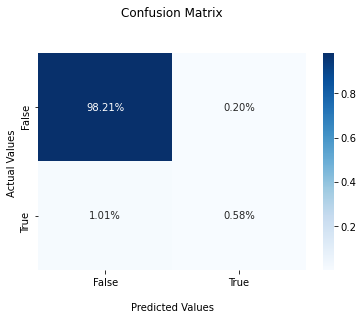

In [61]:
# Confusion Matrix Visualization
import seaborn as sns

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Inserting Labels
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Plotting the Confusion Matrix using percentages
plt.show()

In [62]:
# Checking the accuracy of the ML model
accuracy_score(y_test, y_pred)

0.9878666666666667

<br>
<p style='text-align: justify;'>As it is possible to see above, using Random Forest Classifier it is possible to predict with over 98% of accuracy if the components failures in the trucks are related to the APS.<br>
It is also interesting to notice the percentage of the data in each quadrant of the confusion matrix.</p>
<br><br>

### Being careful with high accuracy

<p style='text-align: justify;'>As it was shown previously in this CA, this dataset is imbalanced. It means that, regarding accuracy,  it is difficult to affirm that the high accuracy of the model really reflects great results for the model. In cases like this, there will always be the possibility that the high accuracy is happening because the model simply decided that the best way to be right is to predict a specific value.<br><br>
Considering that it is impossible to collect more data, there are some techniques that could be used in order to avoid misleading accuracy. The Synthetic Minority Oversampling Technique (SMOTE) is one popular approach to address this problem. However, for this CA, this issue will not be solved.<br><br>
Nevertheless, I am curious to have a better idea of the performance of different machine learning models in this imbalanced dataset. In order to have it done, some Cross Validation will be used. According to Gupta, (2017) Cross Validation is a very useful technique for assessing the effectiveness of a model, particularly in cases where it is necessary to mitigate overfitting.</p>

In [63]:
# Importing the necessary libaries
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [64]:
# Putting diferent models of ML into models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [65]:
# Checking the accurancy of the models
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.983422 (0.000959)
LDA: 0.971600 (0.001373)
KNN: 0.986178 (0.001101)
CART: 0.983978 (0.001082)
NB: 0.885044 (0.002884)
SVM: 0.983089 (0.000067)


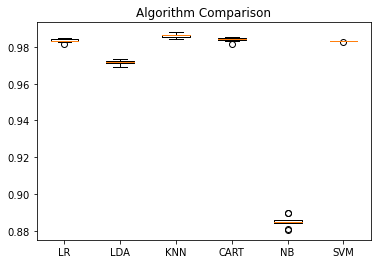

In [66]:
# Plotting the accurancy of the models
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

<br>
As it is possible to see above, most of the Machine Learning models had results better than 97%.
<br><br>

# Part 4

### Curse of Dimensionality

<p style='text-align: justify;'>First of all, let me clarify that the dimension of a dataset can be explained by its number of features, or in other words,  by its number of  columns. It means that dimensionality is basically the number of attributes in a dataset.<br><br>
High dimensional data basically means that a dataset has a large number of dimensions, and consequently, it is more difficult to complete analysis and calculations in it.<br><br>
Keeping this in mind, the Curse of Dimensionality can be simply explained as the phenomenon that describes the difficulties and problems related to working with high-dimensional data. In other words, it becomes more and more difficult to make predictions as more dimensions are added to the dataset.<br><br>
Another way to think about the Curse of Dimensionality is that the processing capacity of a computer system tends to become ineffective as the observations and the characteristics of a dataset increase.<br><br>
It means that the Curse of Dimensionality refers to difficulties that may be faced when analyzing data with many dimensions (often hundreds or thousands of dimensions). It happens because, in theory, for a given number of samples in a database, there is a maximum number of features that a model can handle, thus degrading its performance when a new feature is introduced.<br><br>
This problem is something pretty important to be remembered, since it is usually believed that the more information our models have, the better their performance will be. The Curse of Dimensionality completely contradicts this idea as, in general, adding features to high-dimensional data does not mean that will be an improvement to the performance of a classifier.</p>




<br>

# Conclusion

<p style='text-align: justify;'>During the research period that was needed to conclude this CA, I had the opportunity to better understand some concepts of Exploratory Data Analysis  and Principal Component Analysis. Besides that, after having analyzed a bit the APS failure dataset, I could have a better practice of topics studied in Data Preparation. The experience obtained after dealing with missing values, scaling and modeling gave me an idea of real dataset problems. Besides that, the research made to better understand concepts of duplicates, imbalanced dataset and cross validation will surely be a great help for  my future projects. 
 Finally, all the acquired knowledge after studying Python to conclude this CA may accompany me during my career as a data analyst.</p>
 <br><br>


<br>

# References


Agarwal, R. (2020). The 5 Most Useful Techniques to Handle Imbalanced Datasets. [online] KDnuggets. Available at: https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html [Accessed 29 Mar. 2022].

Alexopoulos, C., Lachana, Z., Androutsopoulou, A., Diamantopoulou, V., Charalabidis, Y. and Loutsaris, M.A. (2019). How Machine Learning is Changing e-Government. Proceedings of the 12th International Conference on Theory and Practice of Electronic Governance. [online] Available at: http://www.icsd.aegean.gr/publication_files/583212650.pdf [Accessed 16 Oct. 2021].

Bhutani, K. (2018). Python | Pandas dataframe.drop_duplicates(). [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/ [Accessed 30 Mar. 2022].

Chandradas, A. (2021). 5 Methods to Check for NaN Values in Python. [online] Medium. Available at: https://towardsdatascience.com/5-methods-to-check-for-nan-values-in-in-python-3f21ddd17eed#:~:text=NaN%20stands%20for%20Not%20A [Accessed 24 Mar. 2022].

Devi (2020). How to handle Missing values? [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/how-to-handle-missing-values-cbd03fb79ef8#:~:text=When%20column%20has%20more%20than [Accessed 24 Mar. 2022].

Fernandez, J. (2021). How data normalization affects your Random Forest algorithm. [online] Medium. Available at: https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf [Accessed 31 Mar. 2022].

Galarnyk, M. (2018). Understanding Boxplots. [online] Medium. Available at: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51 [Accessed 16 Mar. 2022].

Gupta, P. (2017). Cross-Validation in Machine Learning. [online] Towards Data Science. Available at: https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f [Accessed 1 Apr. 2022].

Kumar, A. (2021). Python - Replace Missing Values with Mean, Median & Mode. [online] Data Analytics. Available at: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=df.mean())- [Accessed 25 Mar. 2022].

Kurita, T. (2020). Principal Component Analysis (PCA). [online] Springer Link. Available at: https://link.springer.com/referenceworkentry/10.1007/978-3-030-03243-2_649-1?noAccess=true [Accessed 25 Mar. 2022].

Roy, B. (2020). All about Feature Scaling. [online] Medium. Available at: https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35 [Accessed 30 Mar. 2022].

Team, G.L. (2020a). Random Forest Algorithm- An Overview | Understanding Random Forest. [online] GreatLearning. Available at: https://www.mygreatlearning.com/blog/random-forest-algorithm/ [Accessed 27 Mar. 2022].

Team, G.L. (2020b). What Is Label Encoding in Python | Great Learning. [online] GreatLearning Blog: Free Resources What Matters to Shape Your Career! Available at: https://www.mygreatlearning.com/blog/label-encoding-in-python/ [Accessed 25 Mar. 2022].

Yi, M. (2021). A Complete Guide to Bar Charts. [online] Chartio. Available at: https://chartio.com/learn/charts/bar-chart-complete-guide/ [Accessed 24 Mar. 2022].

Yiu, T. (2019). Understanding Random Forest. [online] Medium. Available at: https://towardsdatascience.com/understanding-random-forest-58381e0602d2 [Accessed 31 Mar. 2022].